In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

In [3]:
def autonorm(vector_in, min_range, max_range):
    diff = max_range-min_range
    maxmin = max(vector_in)-min(vector_in)
    if maxmin == 0:
        return vector_in*np.mean([min_range, max_range])
    vector_out = ((vector_in - min(vector_in))*diff)/(max(vector_in)-min(vector_in))+min_range
    return vector_out

In [4]:
cisco_data = pd.read_csv("baseline_no_anomaly.csv")

C:\Users\max\AppData\Local\Temp\ipykernel_26604\797759801.py:1: DtypeWarning: Columns (6,37,38,46,63,70,74,82) have mixed types. Specify dtype option on import or set low_memory=False.
  cisco_data = pd.read_csv("baseline_no_anomaly.csv")


In [5]:
col_details = cisco_data.columns

In [6]:
unique_names = cisco_data.name.unique()
print(unique_names)

['Cisco-IOS-XR-fib-common-oper:fib-statistics/nodes/node/drops'
 'Cisco-IOS-XR-infra-statsd-oper:infra-statistics/interfaces/interface/latest/data-rate'
 'Cisco-IOS-XR-infra-statsd-oper:infra-statistics/interfaces/interface/latest/generic-counters'
 'Cisco-IOS-XR-ip-rib-ipv4-oper:rib/vrfs/vrf/afs/af/safs/saf/ip-rib-route-table-names/ip-rib-route-table-name/protocol/bgp/as/information'
 'Cisco-IOS-XR-ipv4-bgp-oper:bgp/instances/instance/instance-active/default-vrf/process-info'
 'Cisco-IOS-XR-nto-misc-oper:memory-summary/nodes/node/summary'
 'Cisco-IOS-XR-wdsysmon-fd-oper:system-monitoring/cpu-utilization']


In [7]:
grouped_data = cisco_data.groupby("name")
dict={}

for i in range(0,len(unique_names)):
    x = unique_names[i].split('/', 100)
    key = str(x[len(x)-1])
    y = grouped_data.get_group(unique_names[i])
    y = y.dropna(axis=1, how = 'all')
    dict[key] = y
    

In [8]:
unique_producers = cisco_data.Producer.unique()
print(unique_producers)

['leaf5' 'leaf1' 'leaf4' 'dr02' 'leaf7' 'spine2' 'spine4' 'leaf3' 'spine3'
 'dr01' 'leaf8' 'leaf2' 'leaf6' 'spine1' 'dr03']


In [9]:
dict["cpu-utilization"].head(3)

,name,time,EncodingPath,Producer,node-name,total-cpu-fifteen-minute,total-cpu-five-minute,total-cpu-one-minute
961061,Cisco-IOS-XR-wdsysmon-fd-oper:system-monitorin...,1503019769439000000,Cisco-IOS-XR-wdsysmon-fd-oper:system-monitorin...,leaf7,0/RP0/CPU0,22.0,22.0,23.0
961062,Cisco-IOS-XR-wdsysmon-fd-oper:system-monitorin...,1503019769837000000,Cisco-IOS-XR-wdsysmon-fd-oper:system-monitorin...,dr01,0/RP0/CPU0,6.0,6.0,7.0
961063,Cisco-IOS-XR-wdsysmon-fd-oper:system-monitorin...,1503019769840000000,Cisco-IOS-XR-wdsysmon-fd-oper:system-monitorin...,dr01,0/0/CPU0,3.0,3.0,3.0


In [35]:
node_name_col = dict["summary"].iloc[:,6]
print(node_name_col)
unique_node_name = node_name_col.unique()
print(unique_node_name)

945301    0/RP0/CPU0
945302    0/RP0/CPU0
945303      0/0/CPU0
945304      0/1/CPU0
945305    0/RP0/CPU0
             ...    
961056    0/RP0/CPU0
961057    0/RP0/CPU0
961058    0/RP0/CPU0
961059    0/RP0/CPU0
961060    0/RP0/CPU0
Name: node-name, Length: 15760, dtype: object
['0/RP0/CPU0' '0/0/CPU0' '0/1/CPU0' '0/RP1/CPU0']


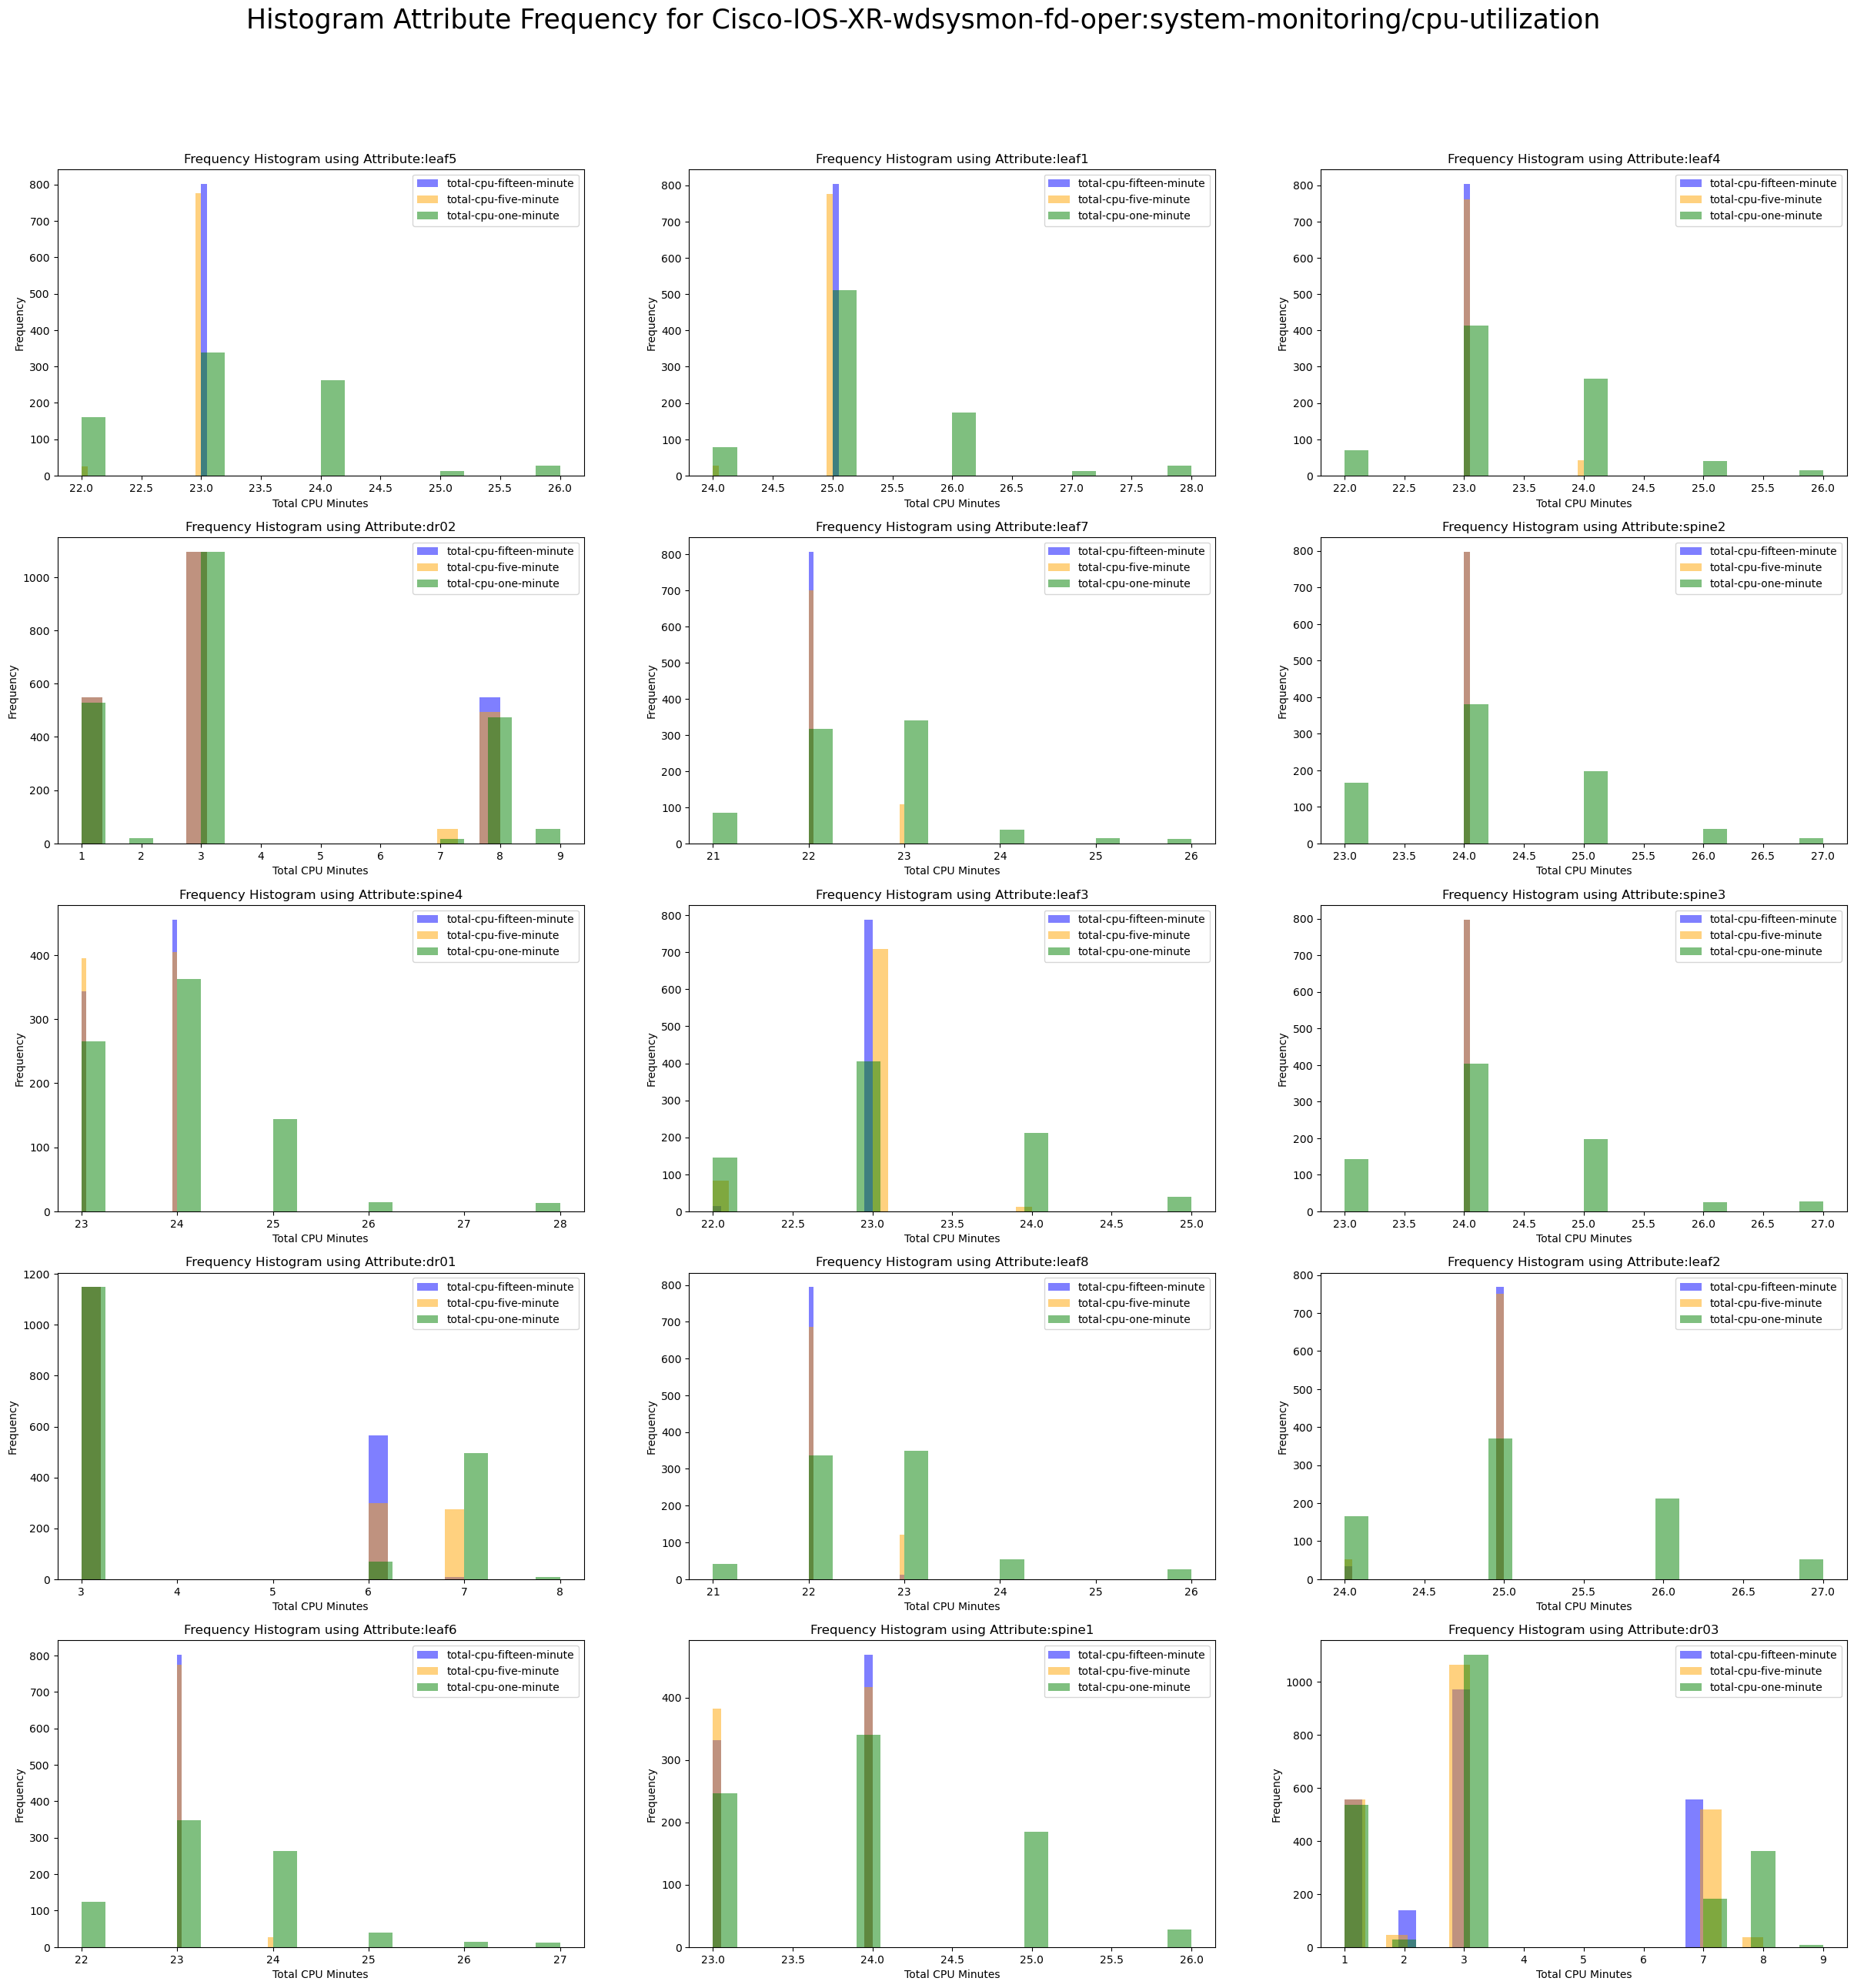

In [7]:
cpu_util_df = dict["cpu-utilization"]
plt.figure(figsize=(30, 30))
plt.suptitle("Histogram Attribute Frequency for Cisco-IOS-XR-wdsysmon-fd-oper:system-monitoring/cpu-utilization",fontsize=25, y=0.95)
for i in range(0,len(unique_producers)):
    dist = plt.subplot(5,3,i+1);
    cpu_util_df_unique = cpu_util_df[cpu_util_df['Producer'] == unique_producers[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"total-cpu-fifteen-minute"].to_numpy()
    plt.hist(cpu_util_df_fifteen, color ='b',alpha = 0.5,bins=20,label='total-cpu-fifteen-minute')
    plt.gca().set(title='Frequency Histogram using Attribute:'+ unique_producers[i], ylabel='Frequency',xlabel='Total CPU Minutes');
    
    
    cpu_util_df_unique = cpu_util_df[cpu_util_df['Producer'] == unique_producers[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"total-cpu-five-minute"].to_numpy()
    plt.hist(cpu_util_df_fifteen, color ='orange',alpha = 0.5,bins=20,label='total-cpu-five-minute')
    
    cpu_util_df_unique = cpu_util_df[cpu_util_df['Producer'] == unique_producers[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"total-cpu-one-minute"].to_numpy()
    plt.hist(cpu_util_df_fifteen, color ='green',alpha = 0.5,bins=20,label='total-cpu-one-minute')
    plt.legend()

In [40]:
dict["summary"]

,name,time,EncodingPath,Producer,free-application-memory,free-physical-memory,node-name,ram-memory,system-ram-memory
945301,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,1503019769453000000,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,leaf7,4.154479e+09,4.191318e+09,0/RP0/CPU0,8.589935e+09,8.589935e+09
945302,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,1503019769519000000,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,spine2,3.975942e+09,4.002882e+09,0/RP0/CPU0,8.589935e+09,8.589935e+09
945303,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,1503019769858000000,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,dr01,9.968222e+09,1.055792e+10,0/0/CPU0,1.416521e+10,1.416521e+10
945304,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,1503019769865000000,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,dr01,9.998479e+09,1.058718e+10,0/1/CPU0,1.416521e+10,1.416521e+10
945305,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,1503019769870000000,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,dr01,1.532516e+10,1.547858e+10,0/RP0/CPU0,1.947310e+10,1.947310e+10
...,...,...,...,...,...,...,...,...,...
961056,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,1503023372474000000,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,spine3,4.129894e+09,4.162146e+09,0/RP0/CPU0,8.589935e+09,8.589935e+09
961057,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,1503023372627000000,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,spine2,3.964248e+09,3.991745e+09,0/RP0/CPU0,8.589935e+09,8.589935e+09
961058,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,1503023372817000000,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,spine1,NaN,4.215534e+09,0/RP0/CPU0,8.589935e+09,8.589935e+09
961059,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,1503023372830000000,Cisco-IOS-XR-nto-misc-oper:memory-summary/node...,spine4,4.138775e+09,4.166742e+09,0/RP0/CPU0,8.589935e+09,8.589935e+09


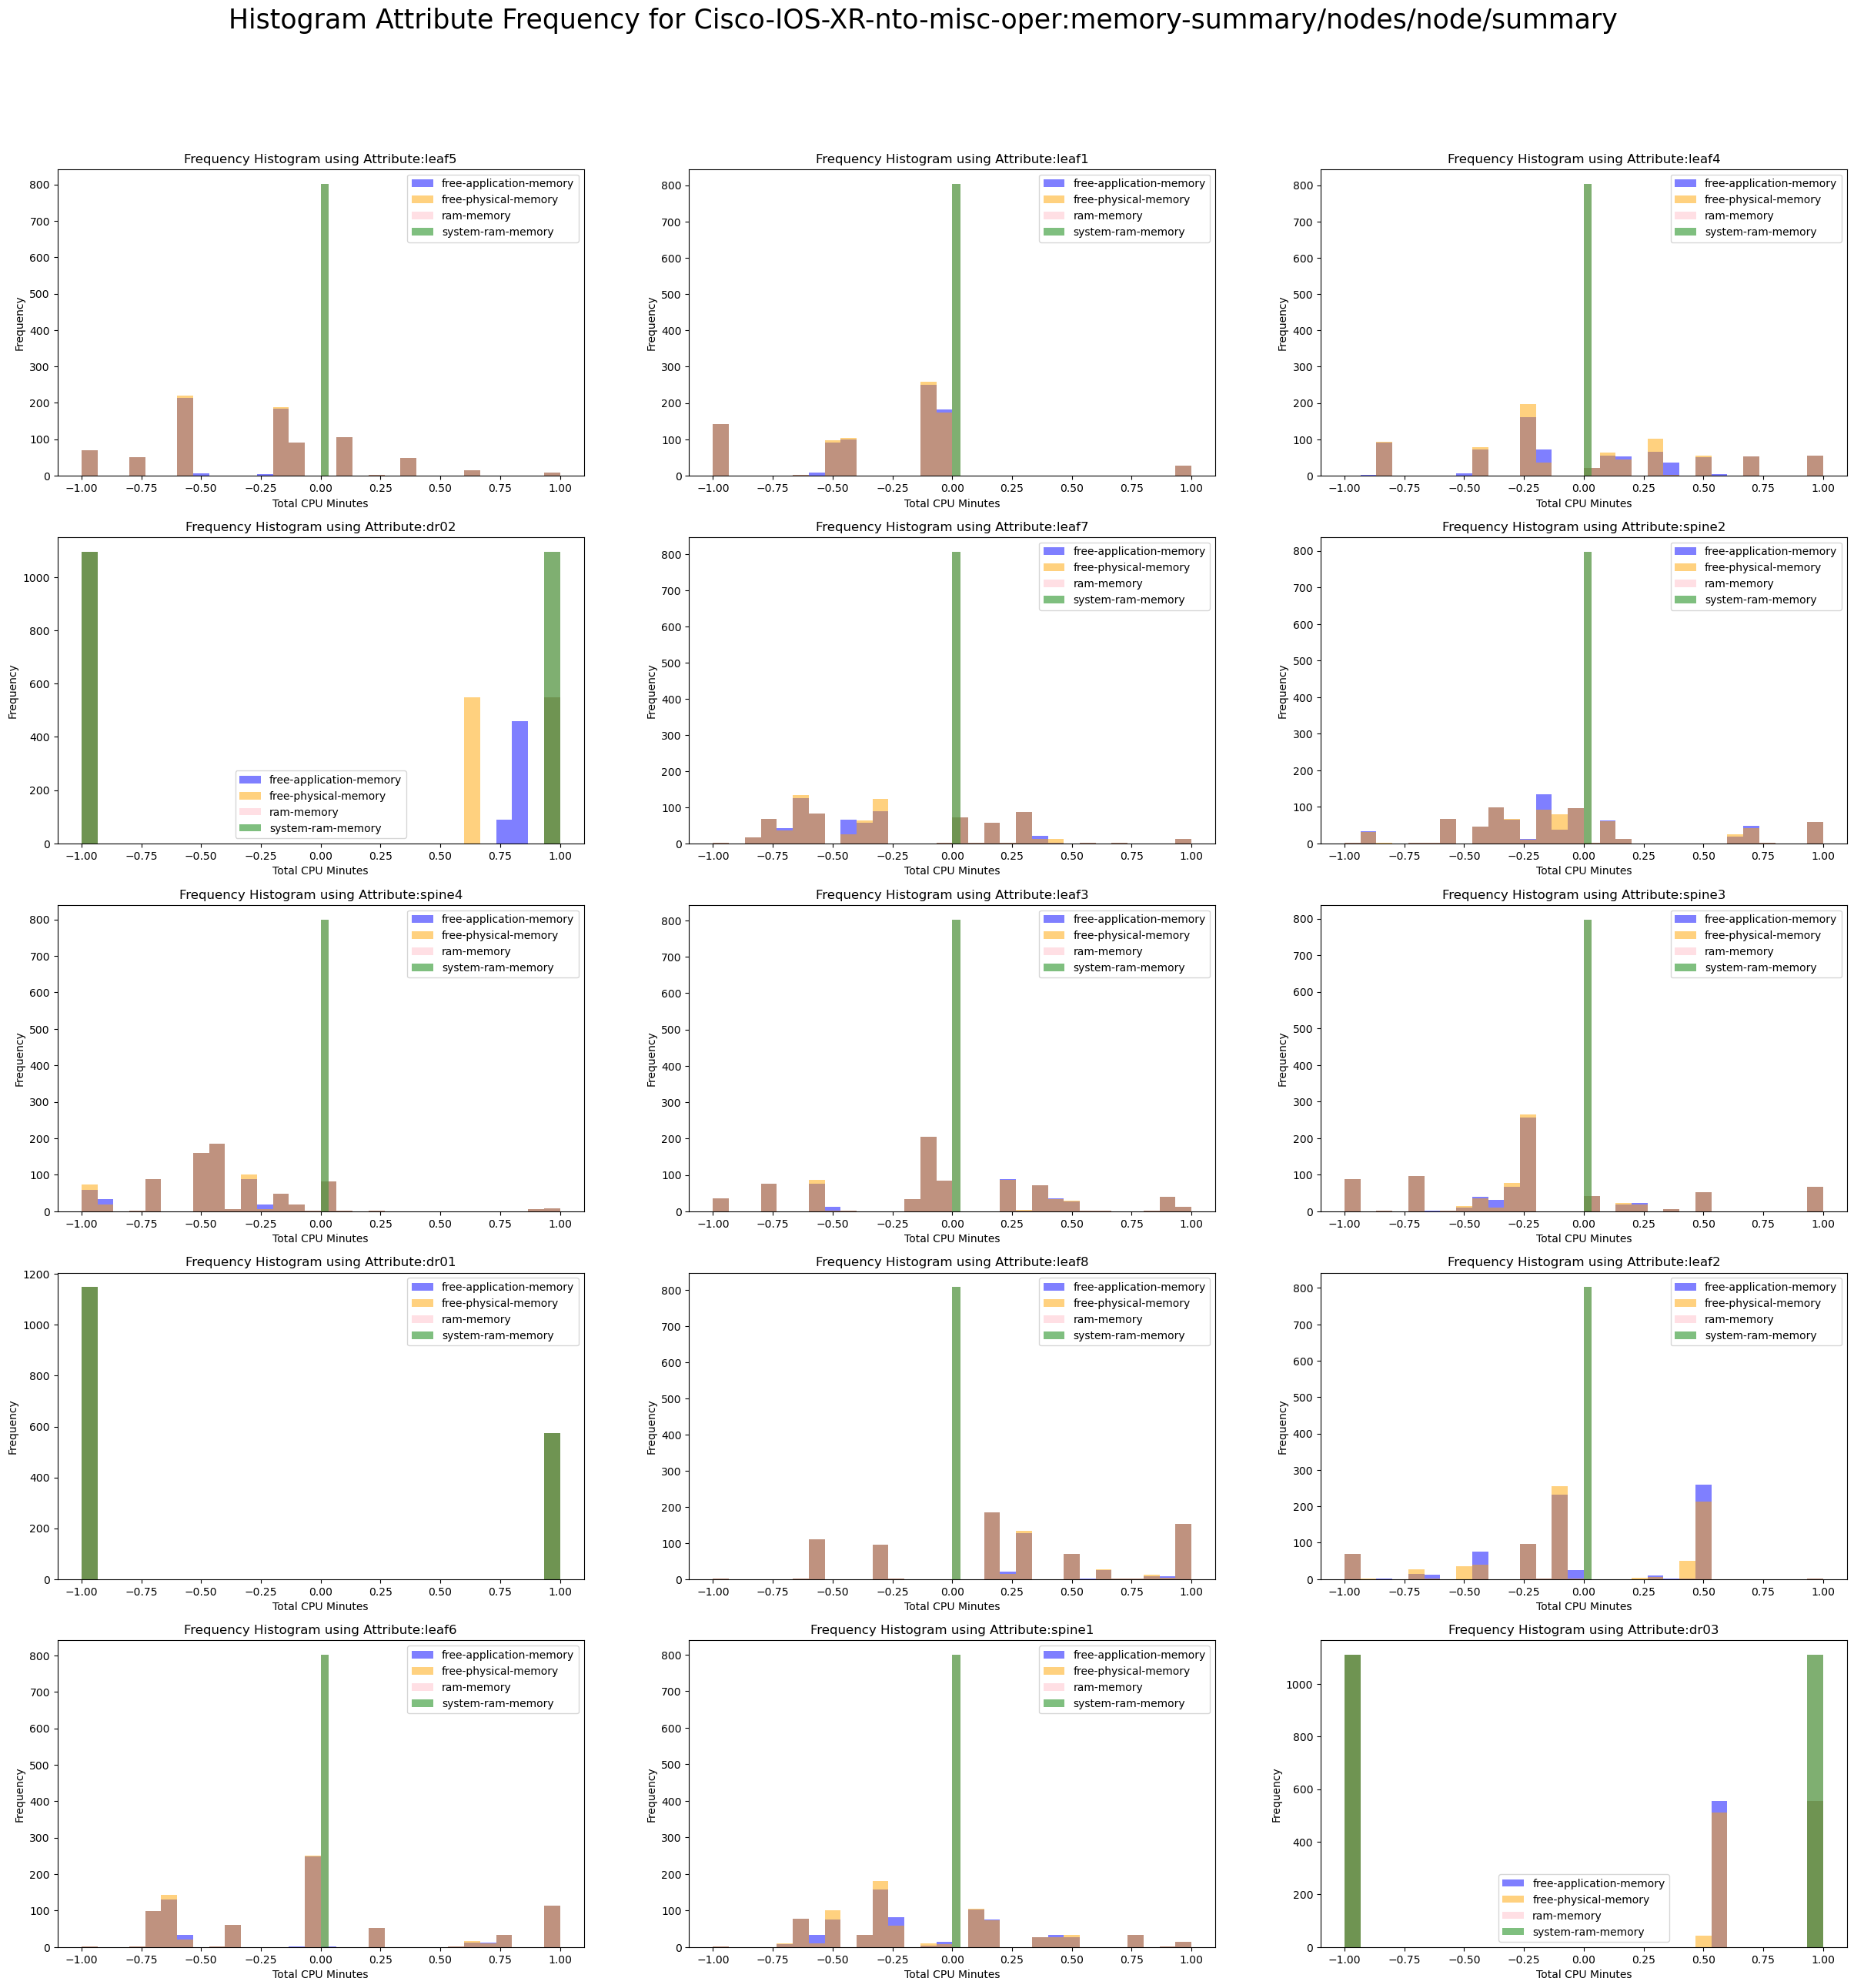

In [33]:
cpu_util_df = dict["summary"]
plt.figure(figsize=(30, 30))
plt.suptitle("Histogram Attribute Frequency for Cisco-IOS-XR-nto-misc-oper:memory-summary/nodes/node/summary",fontsize=25, y=0.95)
for i in range(0,len(unique_producers)):
    dist = plt.subplot(5,3,i+1);
    cpu_util_df_unique = cpu_util_df[cpu_util_df['Producer'] == unique_producers[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"free-application-memory"].to_numpy()
    cpu_util_df_fifteen = autonorm(cpu_util_df_fifteen, -1, 1)
    plt.hist(cpu_util_df_fifteen, color ='blue',alpha = 0.5,bins=30,label='free-application-memory')
    plt.gca().set(title='Frequency Histogram using Attribute:'+ unique_producers[i], ylabel='Frequency',xlabel='Total CPU Minutes');
    
    
    cpu_util_df_unique = cpu_util_df[cpu_util_df['Producer'] == unique_producers[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"free-physical-memory"].to_numpy()
    cpu_util_df_fifteen = autonorm(cpu_util_df_fifteen, -1, 1)
    plt.hist(cpu_util_df_fifteen, color ='orange',alpha = 0.5,bins=30,label='free-physical-memory')
    
    cpu_util_df_unique = cpu_util_df[cpu_util_df['Producer'] == unique_producers[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"ram-memory"].to_numpy()
    cpu_util_df_fifteen = autonorm(cpu_util_df_fifteen, -1, 1)
    plt.hist(cpu_util_df_fifteen, color ='pink',alpha = 0.5,bins=30,label='ram-memory')
    
    cpu_util_df_unique = cpu_util_df[cpu_util_df['Producer'] == unique_producers[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"system-ram-memory"].to_numpy()
    cpu_util_df_fifteen = autonorm(cpu_util_df_fifteen, -1, 1)
    plt.hist(cpu_util_df_fifteen, color ='green',alpha = 0.5,bins=30,label='system-ram-memory')
    
    plt.legend()

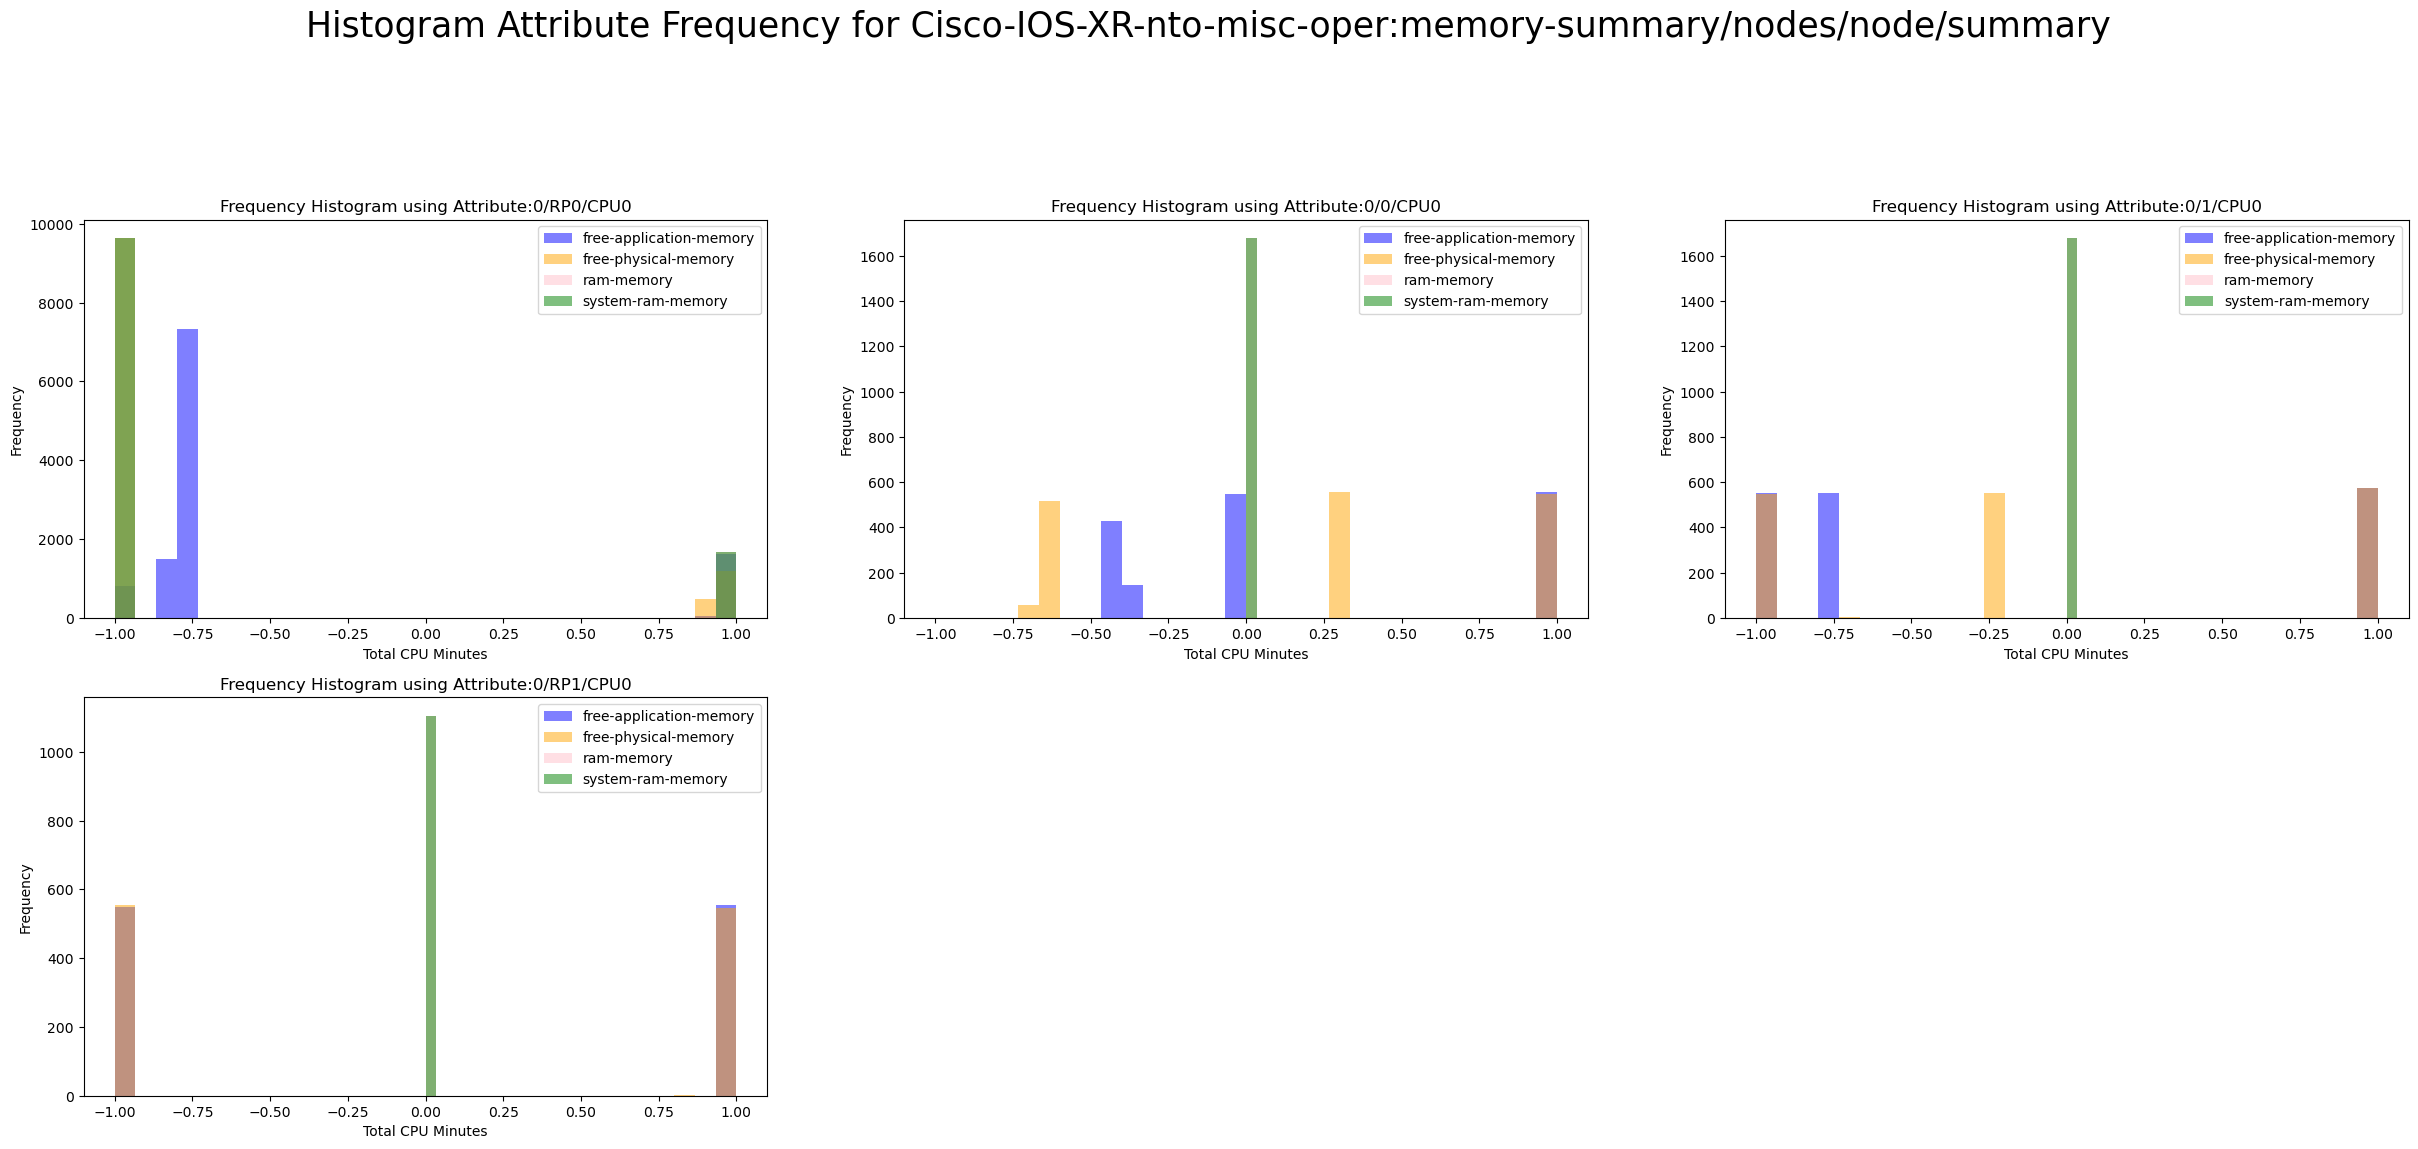

In [39]:
cpu_util_df = dict["summary"]
plt.figure(figsize=(30, 30))
plt.suptitle("Histogram Attribute Frequency for Cisco-IOS-XR-nto-misc-oper:memory-summary/nodes/node/summary",fontsize=25, y=0.95)
for i in range(0,len(unique_node_name)):
    dist = plt.subplot(5,3,i+1);
    cpu_util_df_unique = cpu_util_df[cpu_util_df['node-name'] == unique_node_name[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"free-application-memory"].to_numpy()
    cpu_util_df_fifteen = autonorm(cpu_util_df_fifteen, -1, 1)
    plt.hist(cpu_util_df_fifteen, color ='blue',alpha = 0.5,bins=30,label='free-application-memory')
    plt.gca().set(title='Frequency Histogram using Attribute:'+ unique_node_name[i], ylabel='Frequency',xlabel='Total CPU Minutes');
    
    
    cpu_util_df_unique = cpu_util_df[cpu_util_df['node-name'] == unique_node_name[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"free-physical-memory"].to_numpy()
    cpu_util_df_fifteen = autonorm(cpu_util_df_fifteen, -1, 1)
    plt.hist(cpu_util_df_fifteen, color ='orange',alpha = 0.5,bins=30,label='free-physical-memory')
    
    cpu_util_df_unique = cpu_util_df[cpu_util_df['node-name'] == unique_node_name[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"ram-memory"].to_numpy()
    cpu_util_df_fifteen = autonorm(cpu_util_df_fifteen, -1, 1)
    plt.hist(cpu_util_df_fifteen, color ='pink',alpha = 0.5,bins=30,label='ram-memory')
    
    cpu_util_df_unique = cpu_util_df[cpu_util_df['node-name'] == unique_node_name[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"system-ram-memory"].to_numpy()
    cpu_util_df_fifteen = autonorm(cpu_util_df_fifteen, -1, 1)
    plt.hist(cpu_util_df_fifteen, color ='green',alpha = 0.5,bins=30,label='system-ram-memory')
    
    plt.legend()

In [113]:
dict["data-rate"]

,name,time,EncodingPath,Producer,bandwidth,input-data-rate,input-load,input-packet-rate,interface-name,load-interval,output-data-rate,output-load,output-packet-rate,peak-input-data-rate,peak-input-packet-rate,peak-output-data-rate,peak-output-packet-rate,reliability
15738,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1503019768284000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf4,0.0,0.0,0.0,0.0,Null0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
15739,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1503019768286000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf4,1000000.0,8.0,0.0,6.0,MgmtEth0/RP0/CPU0/0,9.0,10.0,0.0,5.0,0.0,0.0,0.0,0.0,253.0
15740,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1503019768288000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf4,100000000.0,0.0,0.0,0.0,HundredGigE0/0/0/0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
15741,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1503019768291000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf4,100000000.0,91.0,0.0,173.0,HundredGigE0/0/0/1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,255.0
15742,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1503019768293000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf4,100000000.0,0.0,0.0,0.0,HundredGigE0/0/0/2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469472,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1503023368478000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,spine4,100000000.0,0.0,0.0,1.0,HundredGigE0/0/0/27,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,255.0
469473,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1503023368480000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,spine4,100000000.0,0.0,0.0,1.0,HundredGigE0/0/0/28,0.0,26707.0,0.0,775.0,0.0,0.0,0.0,0.0,255.0
469474,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1503023368483000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,spine4,100000000.0,0.0,0.0,1.0,HundredGigE0/0/0/29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,255.0
469475,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1503023368485000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,spine4,100000000.0,0.0,0.0,1.0,HundredGigE0/0/0/30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,255.0


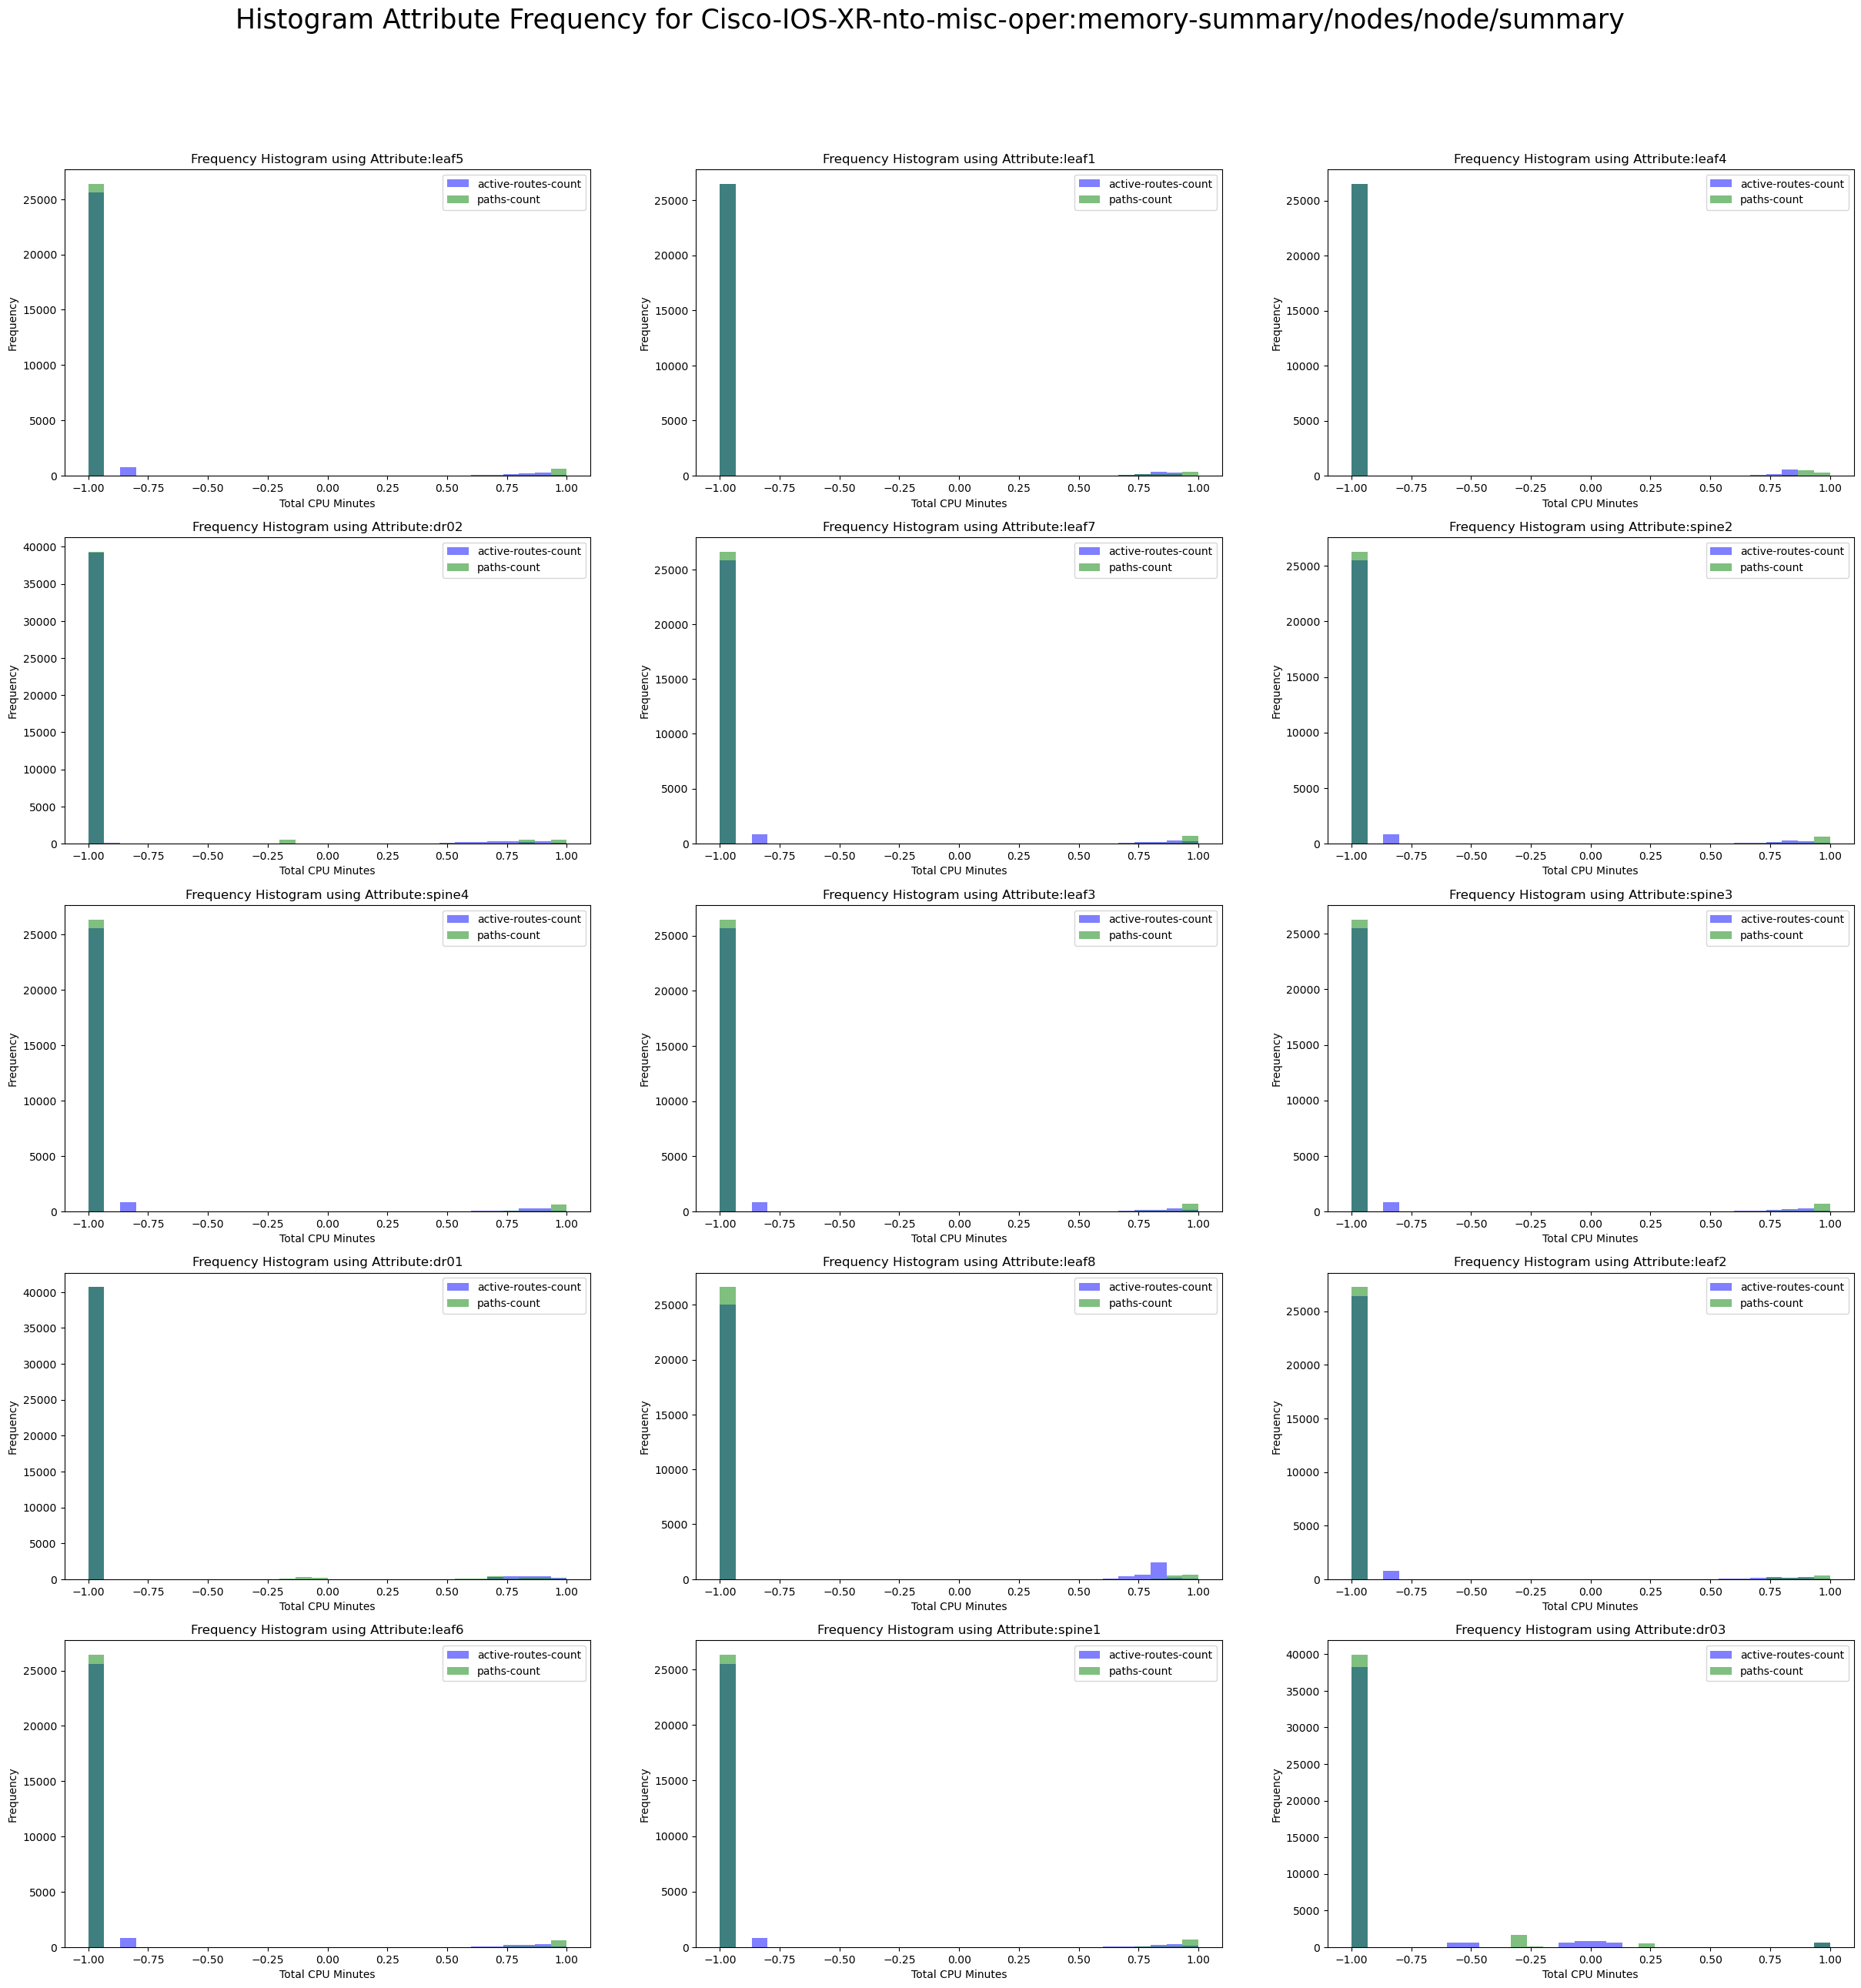

In [115]:
cpu_util_df = dict["data-rate"]
plt.figure(figsize=(30, 30))
plt.suptitle("Histogram Attribute Frequency for Cisco-IOS-XR-nto-misc-oper:memory-summary/nodes/node/summary",fontsize=25, y=0.95)
for i in range(0,len(unique_producers)):
    dist = plt.subplot(5,3,i+1);
    cpu_util_df_unique = cpu_util_df[cpu_util_df['Producer'] == unique_producers[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"input-data-rate"].to_numpy()
    cpu_util_df_fifteen = autonorm(cpu_util_df_fifteen, -1, 1)
    plt.hist(cpu_util_df_fifteen, color ='blue',alpha = 0.5,bins=30,label='active-routes-count')
    plt.gca().set(title='Frequency Histogram using Attribute:'+ unique_producers[i], ylabel='Frequency',xlabel='Total CPU Minutes');
    
    
    cpu_util_df_unique = cpu_util_df[cpu_util_df['Producer'] == unique_producers[i]]
    cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"output-data-rate"].to_numpy()
    cpu_util_df_fifteen = autonorm(cpu_util_df_fifteen, -1, 1)
    plt.hist(cpu_util_df_fifteen, color ='green',alpha = 0.5,bins=30,label='paths-count')
    
    plt.legend()

(1.0, 2000.0)

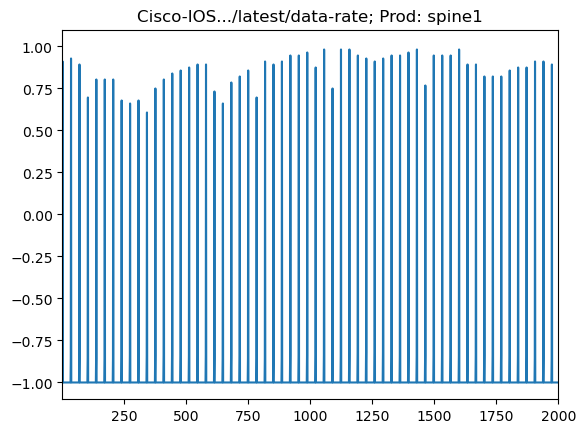

In [190]:
cpu_util_df_unique = cpu_util_df[cpu_util_df['Producer'] == "spine1"]
cpu_util_df_fifteen = cpu_util_df_unique.loc[:,"input-data-rate"].to_numpy()
cpu_util_df_fifteen = autonorm(cpu_util_df_fifteen, -1, 1)
plt.hist(cpu_util_df_fifteen, color ='blue',alpha = 0.5,bins=30,label='active-routes-count')

    
    
cpu_util_df_unique = cpu_util_df[cpu_util_df['Producer'] == "spine1"]
cpu_util_df_fifteen1 = cpu_util_df_unique.loc[:,"output-data-rate"].to_numpy()
cpu_util_df_fifteen1 = autonorm(cpu_util_df_fifteen, -1, 1)
#print(max(cpu_util_df_fifteen))
#plt.plot(cpu_util_df_fifteen)
plt.plot(cpu_util_df_fifteen1)
plt.ylim([-1.1, 1.1])
plt.title("Cisco-IOS.../latest/data-rate; Prod: spine1")
plt.xlabel("")
plt.xlim([1, 2000])

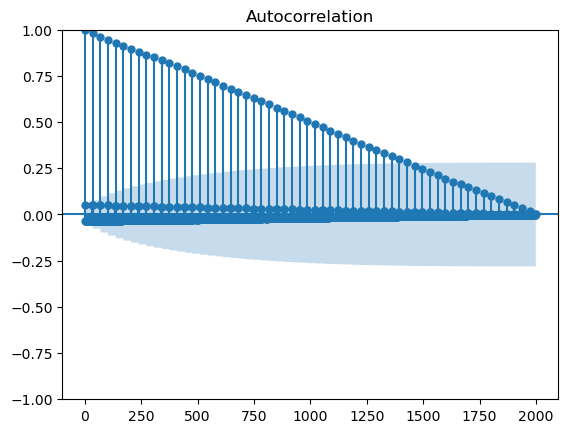

In [189]:
fig = tsaplots.plot_acf(cpu_util_df_fifteen[0:2000], lags=2000-1)
plt.show()

In [134]:
max(cpu_util_df_fifteen1 - cpu_util_df_fifteen)

0.0

(array([442725.,      0.,   7690.,      0.,   1388.,   1382.,      0.,
             0.,      0.,    554.]),
 array([     0. ,  10467.1,  20934.2,  31401.3,  41868.4,  52335.5,
         62802.6,  73269.7,  83736.8,  94203.9, 104671. ]),
 <BarContainer object of 10 artists>)

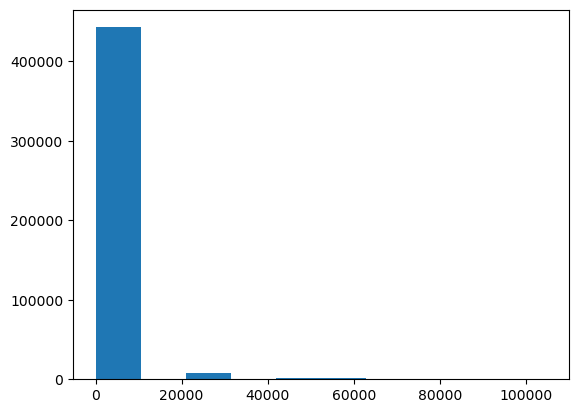

In [137]:
plt.hist(dict["data-rate"].loc[:,"input-data-rate"].to_numpy())

(array([4.47119e+05, 3.04400e+03, 3.13000e+02, 2.15500e+03, 0.00000e+00,
        0.00000e+00, 5.54000e+02, 0.00000e+00, 0.00000e+00, 5.54000e+02]),
 array([     0. ,  34581.4,  69162.8, 103744.2, 138325.6, 172907. ,
        207488.4, 242069.8, 276651.2, 311232.6, 345814. ]),
 <BarContainer object of 10 artists>)

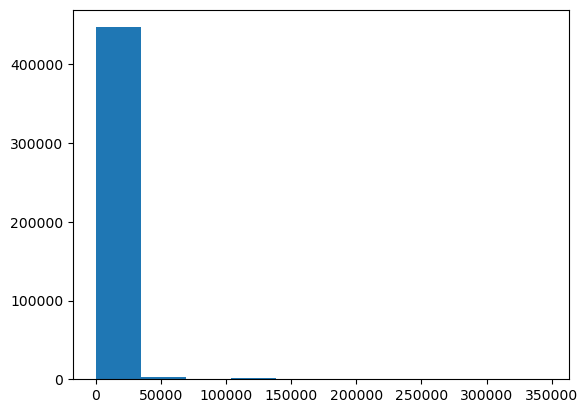

In [138]:
plt.hist(dict["data-rate"].loc[:,"output-data-rate"].to_numpy())

(1.0, 2000.0)

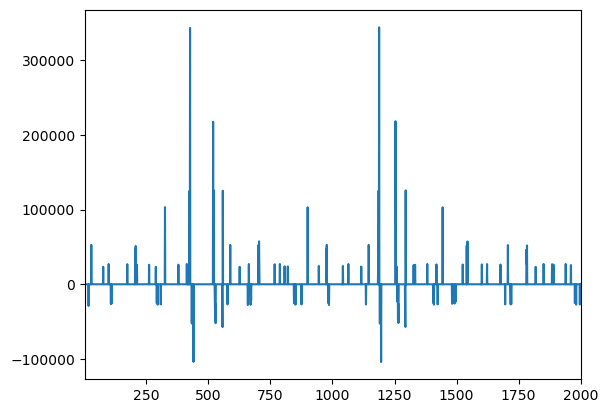

In [141]:
plt.plot(dict["data-rate"].loc[:,"output-data-rate"].to_numpy()-dict["data-rate"].loc[:,"input-data-rate"].to_numpy())
plt.xlim([1, 2000])

In [166]:
v = dict["data-rate"].loc[:,"Producer"].to_numpy()
v[0]

'leaf4'

In [167]:
g = np.zeros([len(v),1])
for i in range(0, len(v)):
    nprod = np.where(unique_producers == v[i])#unique_producers.index(prod)
    g[i] = nprod[0][0]

In [159]:
p = np.where(unique_producers == "leaf5")
p[0][0]

0

(1.0, 5000.0)

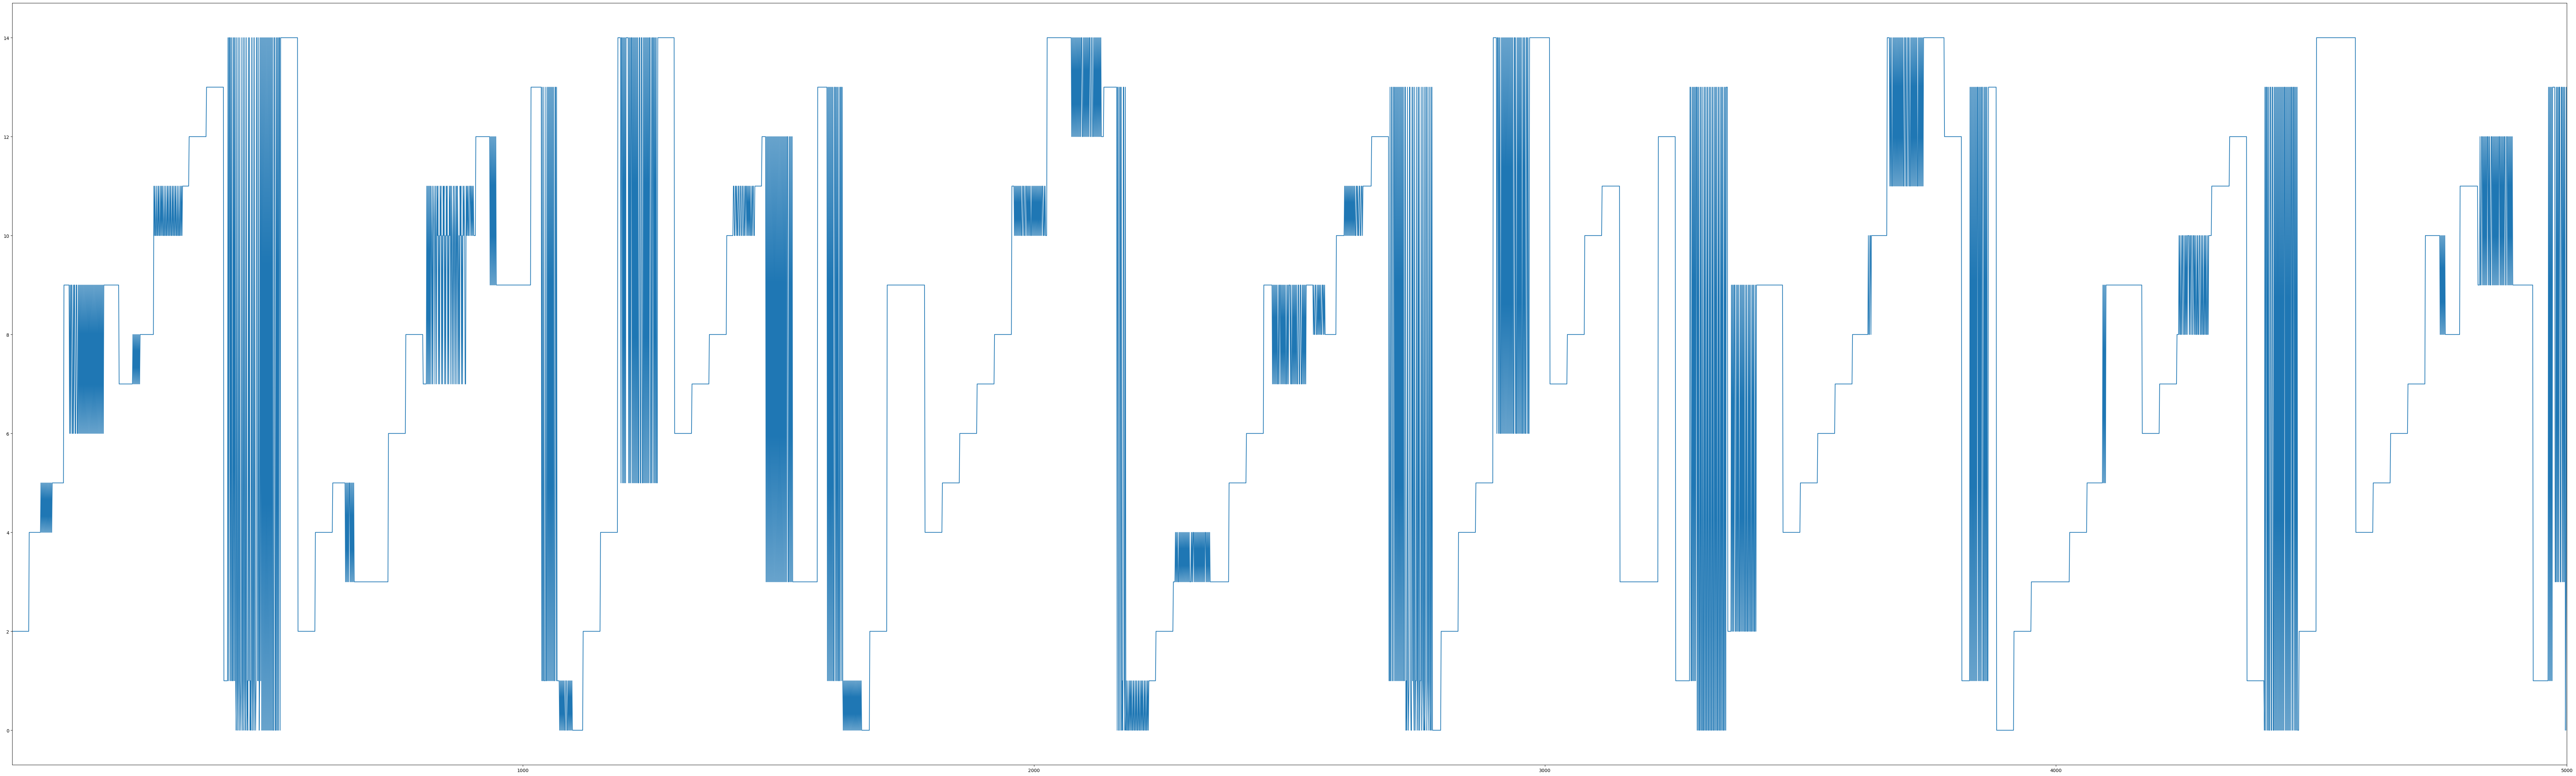

In [180]:
plt.figure(figsize=(100, 30))
plt.plot(g)
plt.xlim([1, 5000])


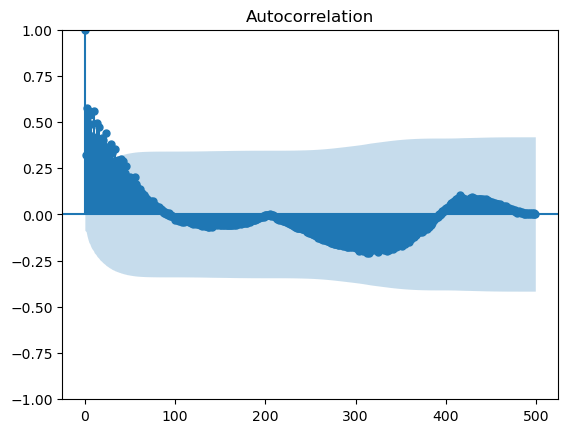

In [186]:


# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(g[0:500], lags=500-1)
plt.show()

In [185]:
g[0:500]

array([[ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 2.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 4.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 4.],
       [ 5.],
       [ 4.],
      